# Detect structure in quasicrystal patterns

To show complex graphics, you may need to strat Jupyter with this command

    jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [1]:
%matplotlib inline

from numpy import *
from matplotlib.pylab import *
import scipy
import scipy.spatial
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
from neurotools.plot import *
import neurotools.plot
from neurotools.nlab import *
plt.set_cmap('viridis')

Loading nlab namespace
Could not locate the spectrum module, please install it
Multitaper methods will not work
Could not locate the spectrum module, please install it
Multitaper methods will not work


# Render quasicrystal as sum of plane waves

In [72]:
K  = 300  # frequency of waves. Higher = more
N  = 1000 # size of domain for rasterizing
M  = 11   # number of waves

# Generate grid
x  = linspace(-1,1,N)
y  = linspace(-1,1,N)
xy = x[:,None] + 1j*y[None,:]

In [73]:
phases = ones(M)*pi*0
rotation = exp(linspace(0,pi,M+1)[:M]*1j)
xyr = array(xy)*0
qqphases = []
for p,rr in zip(phases,rotation):
    print(rr)
    phase = real(xy*rr)*K+p
    xyr += cos(phase)
    qqphases.append(array(phase))
qq = xyr#-xyr**2
qq = real(-qq)
#subplot(131)
imshow(qq)

(1+0j)
(0.809016994375+0.587785252292j)
(0.309016994375+0.951056516295j)
(-0.309016994375+0.951056516295j)
(-0.809016994375+0.587785252292j)


# Region similarity based on phase vector model

Translation in the quasicrystal is equivalent to applying local phase shifts. The vector of phases of each wave at a point describes the local neighborhood at that point. The phases wrap circularlly on the ring $[0,2\pi)$, and shifts in $(x,y)$ apply (correlated) shifts to the phase vectors.

I wonder whether we can use this to find and trace cool structures in the crystal?

In [74]:
qqphases = array(qqphases)%(2*pi)
print(qqphases.shape,qqphases.dtype)

(5, 1000, 1000) float64


In [75]:
ordered = numpy.sort(qqphases,axis=0)

subplot(221)
imshow(ordered[0])
subplot(222)
imshow(ordered[1])
subplot(223)
imshow(ordered[2])
subplot(224)
imshow(ordered[3])

# or could try this

In [76]:
# all pairwise angles? Will form a weird manifold. Hmm

angles = exp(1j*qqphases)

In [77]:
angles.shape

(5, 1000, 1000)

In [78]:
dotprod = (angles[None,...]*conj(angles[:,None,...]))
featurevec = dotprod.reshape((M*M,N*N))

In [79]:
w,v=pca(featurevec.T,n_keep=(M*(M+1)//2))

In [80]:
pca

<function neurotools.stats.stats.pca>

In [81]:
projection = (v.T.dot(featurevec))

In [82]:
imshow(real(projection[-2].reshape((N,N))))

In [83]:
imshow(abs(featurevec.sum(axis=0)).reshape((N,N)))

In [84]:
imshow((real(angles)**2).sum(axis=0));

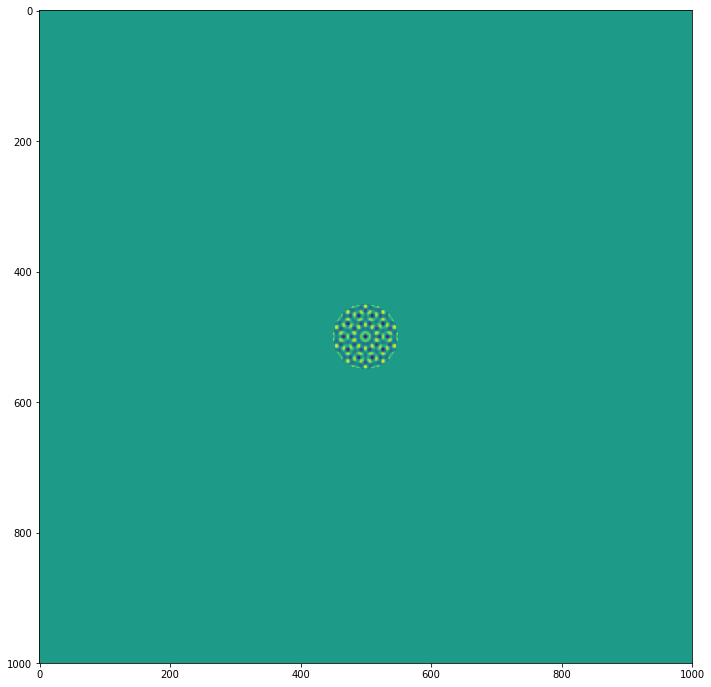

In [88]:
sigma = 0.1
mask = exp(-0.5*abs(xy)**2/sigma**2)
mask = abs(xy)<0.1
imshow(mask*qq)

In [93]:
rr = scipy.signal.fftconvolve(qq*mask,qq**4,mode='same');

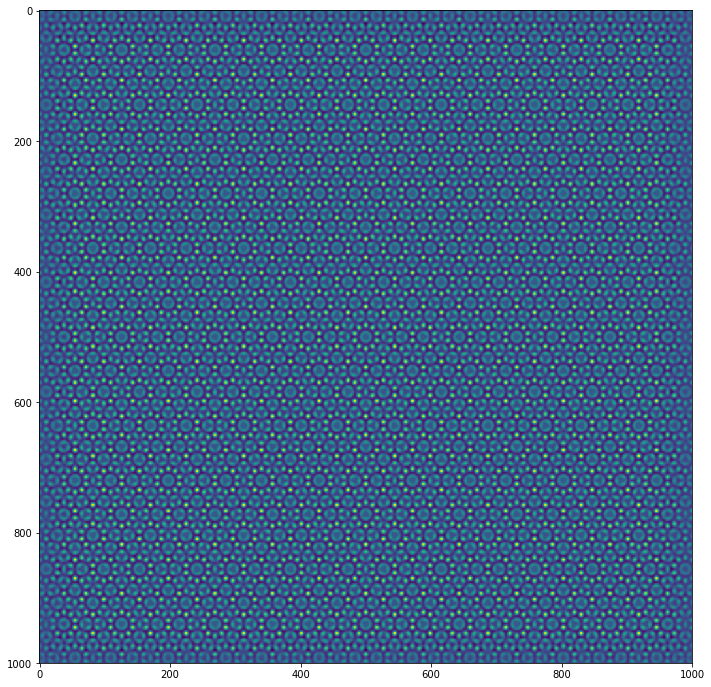

In [94]:
imshow(rr)